In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import sys
sys.path.append('..')
import ODE_Dynamics as od

In [2]:
# Equillibrium: (alpha*gamma/beta*c, L/alpha - gamma*mu/beta*c, c*L/alpha*gamma - mu/beta)
# When beta*c*L = alpha*gamma*mu,(L/mu,0,0) is either a saddle point or an asymptotically stable node.
# Otherwise eventually there remain infected cells, virions and uninfected cells in equilibrium.

par=tf.constant(np.array([[5E3,0.01,5E-7,0.5,20,10]], dtype=np.float32))
mod = od.ViralDynamics(par)
V0 = 1E4
X0 = 1E6
Y0 = 1E4
init_state=tf.constant(np.array([[V0,X0,Y0]], dtype=np.float32))
init_time=tf.constant(0.0)
soln_times=tf.constant(np.linspace(0.0,50.0,num=500,dtype=np.float32))


In [3]:
dp = tfp.math.ode.DormandPrince()
results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
print(results.diagnostics)

_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=1602>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, num_matrix_factorizations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, status=<tf.Tensor: shape=(), dtype=int32, numpy=0>)


In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.xlabel('Time')
plt.ylabel('Number of virus particles')
plt.title("Viral Dynamics of 5 Patients")
sample_size = 1
index = 1
mu_b, sigma_b = 5, 1

while index <= sample_size:
    beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
    L = 0.0025/beta
    par=tf.constant(np.array([[L,0.01,beta*1E-7,0.5,20,10]], dtype=np.float32))
    mod = od.ViralDynamics(par)
    V0 = np.random.normal(1E3, 1E2, 1)
    X0 = 1E6
    Y0 = V0
    init_state=tf.constant(np.array([[V0,X0,Y0]], dtype=np.float32))
    init_time=tf.constant(0.0)
    soln_times=tf.constant(np.linspace(0.0,50.0,num=100,dtype=np.float32))
    
    dp = tfp.math.ode.DormandPrince()
    results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
    print(results.diagnostics)
    
    t = results.times ; v = results.states[...,0] ;
    print("printing v")
    print(v)
    plt.plot(t, v,"r-",linewidth=1)
    
    index +=1
    
plt.savefig('multiple_viral_dynamic_5.png', dpi=300, bbox_inches='tight')

_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=1470>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, num_matrix_factorizations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, status=<tf.Tensor: shape=(), dtype=int32, numpy=0>)
printing v
tf.Tensor(
[[1094.122    ]
 [2052.489    ]
 [2013.2227   ]
 [1963.0795   ]
 [1913.8053   ]
 [1864.7194   ]
 [1811.8853   ]
 [1765.3553   ]
 [1714.073    ]
 [1659.9225   ]
 [1609.6085   ]
 [1555.6659   ]
 [1505.2743   ]
 [1455.7107   ]
 [1401.9034   ]
 [1351.6171   ]
 [1300.6342   ]
 [1249.5686   ]
 [1203.2078   ]
 [1153.6764   ]
 [1105.2158   ]
 [1059.0627   ]
 [1011.17834  ]
 [ 968.669    ]
 [ 925.28186  ]
 [ 881.014    ]
 [ 840.3825   ]
 [ 798.6188   ]
 [ 760.2972   ]
 [ 723.55304  ]
 [ 685.4085   ]
 [ 650.3466   ]
 [ 615.6075   ]
 [ 582.3576   ]
 [ 551.982    ]
 [ 520.6886   ]
 [ 491.2287   ]
 [ 463.24185  ]
 [ 435.72662  ]
 [ 411.08566  ]
 [ 386.3529   ]
 [ 362.4621   ]
 [ 340.46436  ]
 [ 318.7

In [5]:
plt.savefig('multiple_viral_dynamic_5.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

(100, 5)
_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=1596>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, num_matrix_factorizations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, status=<tf.Tensor: shape=(), dtype=int32, numpy=0>)


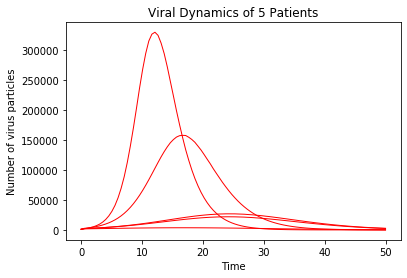

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.xlabel('Time')
plt.ylabel('Number of virus particles')
plt.title("Viral Dynamics of 5 Patients")
sample_size = 4
index = 1
mu_b, sigma_b = 5, 1
beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
L = 0.0025/beta
par=np.array([[L,0.01,beta*1E-7,0.5,20.0,10.0]])
V0 = np.random.normal(1E3, 1E2, 1)
X0 = 1E6
Y0 = V0
init_state=(np.array([[V0,X0,Y0]], dtype=np.float32))

while index <= sample_size:
    beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
    L = 0.0025/beta
    par_new=np.array([[L,0.01,beta*1E-7,0.5,20.0,10.0]])
    par = np.concatenate((par, par_new), axis = 0)
    V0 = np.random.normal(1E3, 1E2, 1)
    X0 = 1E6
    Y0 = V0
    init_state_new=(np.array([[V0,X0,Y0]], dtype=np.float32))
    init_state = np.concatenate((init_state, init_state_new), 0)
    
    index +=1

par = tf.constant(par, dtype=tf.float32)
init_state = tf.constant(init_state, dtype=tf.float32)
mod = od.ViralDynamics(par)
init_time=tf.constant(0.0)
soln_times=tf.constant(np.linspace(0.0,50.0,num=100,dtype=np.float32))
    
dp = tfp.math.ode.DormandPrince()
results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
t = results.times ; v = results.states[...,0] ;
plt.plot(t, v,"r-",linewidth=1)
print(v.shape)
print(results.diagnostics)
plt.savefig('multiple_viral_dynamic_5.png', dpi=300, bbox_inches='tight')

In [ ]:
# Raw code for epidemic simulation

import math
from random import sample

# Return number tested and number of positives over duration
n_tests = [0]; n_positives = [0];

# Set population size and duration of the epidemic
pop_size = 10000
pop_id = [id for id in range(pop_size)]
duration = 150  #150

# Set parameters for epidemic model
R0 = 1.8
mu = 5.0E-08
nu = 0.1
par=tf.constant(np.array([[R0, mu, nu]], dtype = np.float32))

# Set parameters for viral load model
mu_b, sigma_b = 5, 1

# Find viral load threshold: 1E-05 of the maximum load
# Example 1: Threshold for COVID-19 RT-PCR test is 6.25 cp/μL. Maximum load about 6.25E5
# Example 2: HIV load ranges about (1E4, 1E6). Threshold is 20 for RT-PCR
v_threshold = 170306.4 * 1E-05

# Set probability of exhibiting symptom (studies show about 0.55)
prob_s_i = 0.55
# Probability of symptoms and no infection
# Every year 9% of world population is infected by seasonal flu
prob_s_ibar = 0.1
# False postive probability
prob_fp = 0

# Get epidemic model
mod = od.SIR(par)

# At the start of the epidemic most people are succeptible
init_state=tf.constant(np.array([[0.001,0.999]], dtype=np.float32))

# Generate time stamps for duration of epidemic
init_time=tf.constant(0)
num = int(duration)
soln_times=tf.constant(np.linspace(0, duration, num, dtype=np.int32))

# Get I, S, R values through duration of the epidemic
dp = tfp.math.ode.DormandPrince()
results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
t = results.times
i = results.states[:,0,0] ; s = results.states[:,0,1] ; r = 1.0 - i - s;

# Before epidemic everybody is succeptible
I = []
S = pop_id
R = []

# Record id of individuals in I, S, R compartments at time = 0

time = 0
n_i = int(pop_size * i.numpy()[time])
n_s = int(pop_size * s.numpy()[time])
n_r = int(pop_size * r.numpy()[time])

I = sample(pop_id, n_i)
S = [id for id in S if id not in I]
R = []

# Record time stamp of infection for each infected individual

I_T = [0] * len(I)

# Record people who tested positive

positives = []

while time < duration-1:
    
    time += 1
    
    # New births
    n_b = math.floor(mu * len(S))
    pop_size += n_b
    
    if n_b > 0:
        id_first = pop_size + 1
        id_last = id_first + n_b -1
        new_id = [id for id in range(id_first, id_last, 1)]
        S.append(new_id)
    
    # Removal by death
    s1 = math.floor(mu * len(S))
    if s1 > 0:
        S1 = sample(S, s1)
        S = [id for id in S if id not in S1]

    i1 = math.floor(mu * len(I))
    if i1 > 0:
        I1 = sample(I, i1)
        for id in I1:
            ind = I.index(id)
            print(ind, len(I_T), len(I))
            del I_T[ind]
            del I[ind]
        
    r1 = math.floor(mu * len(R))
    if r1 > 0:
        R1 = sample(R, r1)
        R = [id for id in R if id not in R1]

    pop_size = pop_size - s1 - i1 -r1
    
    n_i0 = int(pop_size * i.numpy()[time-1])
    n_s0 = int(pop_size * s.numpy()[time-1])
    n_r0 = pop_size - n_i0 - n_s0
    
    n_i = int(pop_size * i.numpy()[time])
    n_s = int(pop_size * s.numpy()[time])
    n_r = pop_size - n_i - n_s
    
    # New numbers of I, S, R at time
    dn_s = n_s0 - n_s; dn_r = n_r - n_r0
    
    # Update I, S, R compartments
    if dn_s <= len(S):
        I0 = sample(S, dn_s)
        S = [id for id in S if id not in I0]
        I = I + I0
        I_T = I_T + [time] * len(I0)
    else:
        I = I + S
        S = []
    
    if dn_r <= len(I):
        R0 = sample(I, dn_r)
        for id in R0:
            ind = I.index(id)
            del I_T[ind]
            del I[ind]
        R = R + R0
    else:
        R = R + I
        I = []
        I_T = []
        break
    
    # Choose infected individuals who are symptomatic
    smp_i = []; I_T_smp = []
    for id in range(len(I)):
        if int(np.random.binomial(size = 1, n = 1, p = prob_s_i))== 1:
            smp_i.append(I[id])
            I_T_smp.append(I_T[id])
    
    # Choose healthy individuals who are symptomatic
    S_R = S + R
    smp_ibar = [id for id in S_R if int(np.random.binomial(size = 1, n = 1, p = prob_s_ibar))== 1]
    
    # All symptomatic individual
    smp = smp_i + smp_ibar
    T_smp = I_T_smp + [-1] * len(smp_ibar)
    
    # Only those individuals are tested who have never been tested positive
    tested = [id for id in smp if id not in positives]
    n_tests.append(len(tested))
    
    # Find viral load of infected individuals being tested
    
    # Determine which individuals are tested positive
    
    # Positives among infected
    pos1 = []
    
    # Find viral load of all infected individuals being tested
    smp_i_tested = [id for id in smp_i if id in tested]
    for id in range(len(smp_i_tested)):
        tau = time - I_T_smp[id]
        beta = np.random.normal(mu_b, sigma_b, 1)
        L = 0.0025/beta
        par=tf.constant(np.array([[L,0.01,beta*1E-7,0.5,20,10]], dtype=np.float32))
        mod = od.ViralDynamics(par)
        V0 = np.random.normal(1E3, 1E2, 1)
        X0 = 1E6
        Y0 = V0
        init_state=tf.constant(np.array([[V0,X0,Y0]], dtype=np.float32))
        init_time=tf.constant(0.0)
        soln_times=tf.constant(np.linspace(0.0,tau+1,num=tau+1,dtype=np.float32))
        dp = tfp.math.ode.DormandPrince()
        results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
        v = results.states[:,0,0]
        v_tau = v[...,tau].numpy()
#         print(v_tau)
        if v_tau > 10000.0: #v_threshold:
            pos1.append(1)
        else:
            pos1.append(0)
#     print('printing pos1')
#     print(pos1)
    # Positives among uninfected
    pos2 = [id for id in smp_ibar if int(np.random.binomial(1, prob_fp, 1)) == 1]
#      print('printing pos2')
    
    # All positive tests
    pos = pos1 + pos2
    n_positives.append(sum(pos))
#     print(n_positives)
    # Update historical set of all positive individuals
    positives = positives + pos
    
    print(time)
    
import matplotlib.pyplot as plt
plt.plot(t, n_tests,"g-", t, n_positives, "r-")
    



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
